# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# 한글설정
plt.rc('font', family = 'Malgun Gothic')# 윈도우즈
# plt.rc('font', family = 'AppleGothic') Mac
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지
# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 안보이게
# warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 2. 데이터 다운로드
- https://www.data.go.kr 에서 '아파트 분양 가격'을 검색한 csv 다운로드

## (1) 2013년9월부터 2015년8월까지 데이터는 df_first 변수에 담아 탐색

In [2]:
%ls r'D:\KHH\ai\Download\shareData'

파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못되었습니다.


In [3]:
df_first = pd.read_csv(r'D:\KHH\ai\Download\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding='cp949')
df_first.sample(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [4]:
df_first.shape

(17, 22)

In [5]:
pd.options.display.max_columns=22 # 최대 display 가능한 열수

In [6]:
df_first.sample(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
10,충북,6589,6589,6611,6625,6678,6598,6587,6586,6586,6584,6529,6724,6743,6749,6747,6783,6790,6805,6682,6601,6603


In [7]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

color map 참조 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [8]:
df_first_heat = df_first.set_index('지역')

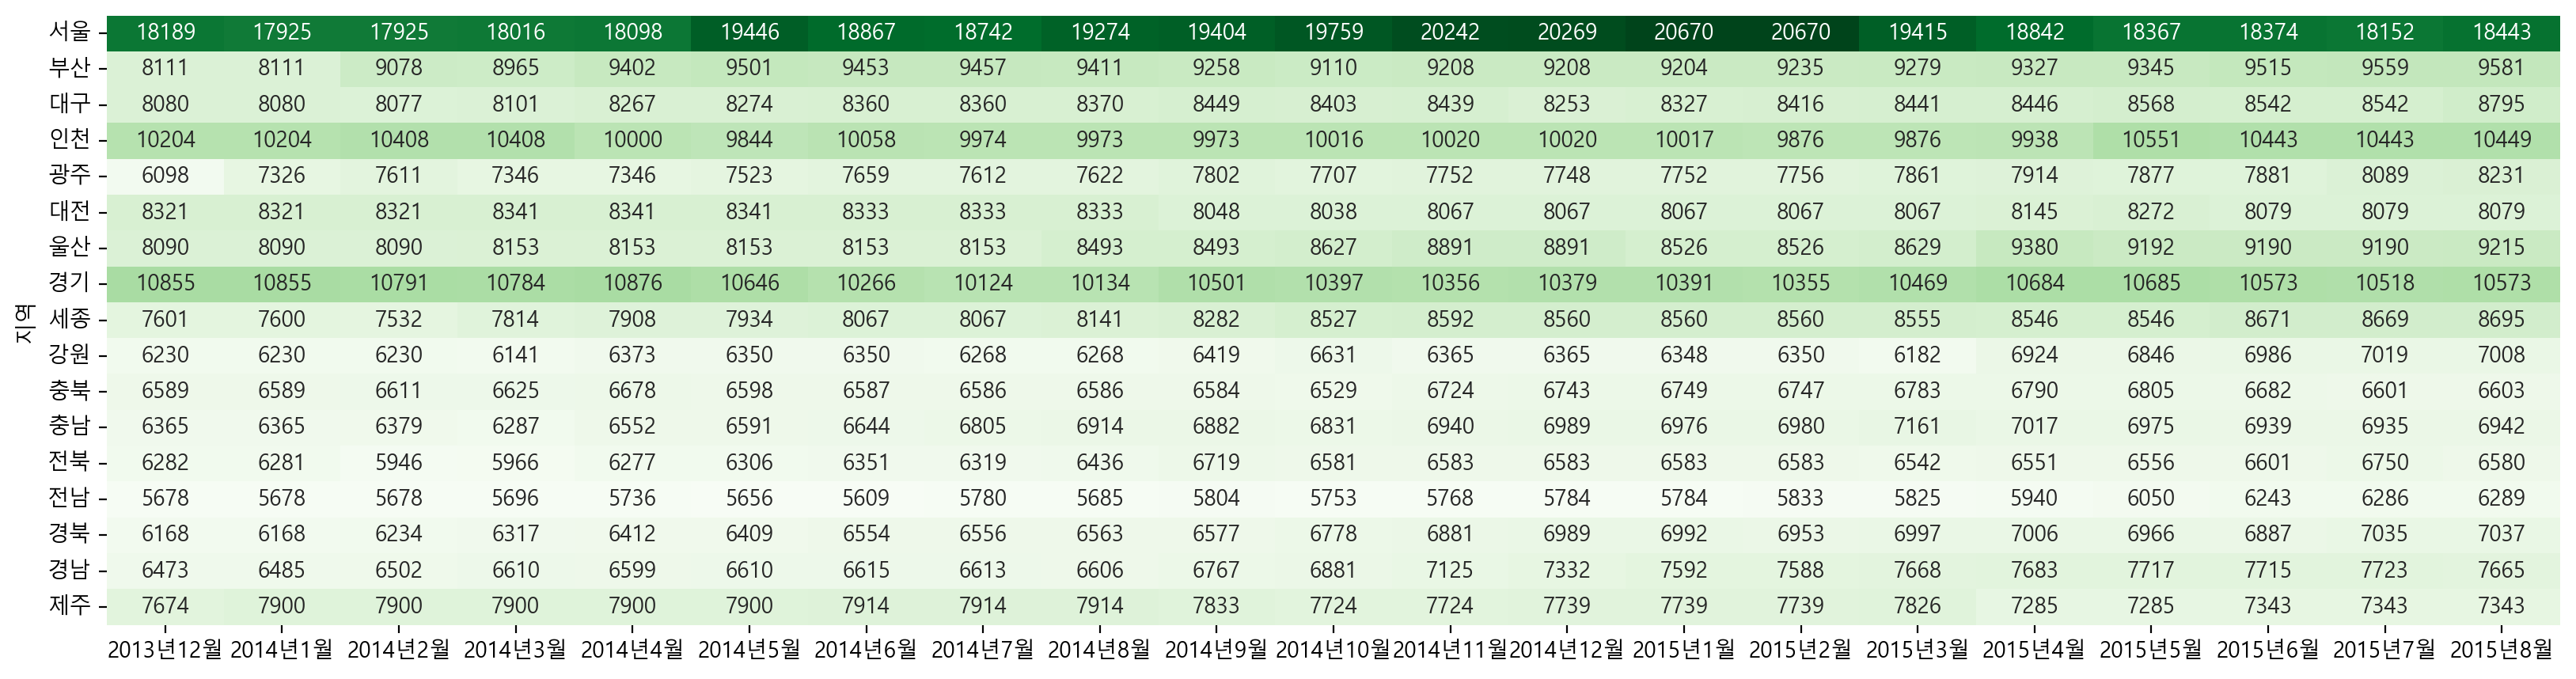

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.show()

## (2) 2015이후 데이터 분양가격에 간헐적으로 comma(,) 추가하여 csv로 출력

In [10]:
ex = pd.read_csv(r'D:\KHH\ai\Download\shareData\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv', encoding='cp949')
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [11]:
ex.info() #ex.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9010 non-null   object
 1   규모구분        9010 non-null   object
 2   연도          9010 non-null   int64 
 3   월           9010 non-null   int64 
 4   분양가격(제곱미터)  8409 non-null   object
dtypes: int64(2), object(3)
memory usage: 352.1+ KB


In [12]:
#분양가격(제곱미터) 결측치 갯수 : isna(), isnull()
ex['분양가격(제곱미터)'].isna().sum()

601

In [13]:
# 분양가격(제곱미터)가 결측치인 행
ex[ex['분양가격(제곱미터)'].isna()].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN


In [14]:
# 분양가격(제곱미터) 컬럼의 type을 float64로 타입변환 : astype, pd.to_numeric()
# ex['분양가격(제곱미터)'].astype('float64')
# pd.to_numeric(ex['분양가격(제곱미터)'])
# ' ' or '  ' 으로 인해 float64 형변환 불가

In [15]:
# 분양가격(제곱미터) 컬림이 space인 행
ex[ex['분양가격(제곱미터)'].str.strip() == ''].head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,
29,광주,전용면적 102제곱미터초과,2015,10,


In [16]:
nanex = ex.loc[368]
spaceex = ex.loc[28]
nanex, spaceex, ex.loc[1]

(지역명                                광주
 규모구분          전용면적 85제곱미터초과 102제곱미터이하
 연도                               2016
 월                                   2
 분양가격(제곱미터)                        NaN
 Name: 368, dtype: object,
 지역명                                광주
 규모구분          전용면적 85제곱미터초과 102제곱미터이하
 연도                               2015
 월                                  10
 분양가격(제곱미터)                           
 Name: 28, dtype: object,
 지역명                      서울
 규모구분          전용면적 60제곱미터이하
 연도                     2015
 월                        10
 분양가격(제곱미터)             5652
 Name: 1, dtype: object)

In [17]:
# 분양가격이 NaN이거나 space면 0 분양가격(제곱미터)의 문자자리수를 return하는 함수
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
#     print(row.notnull()['분양가격(제곱미터)'])
    if row.notnull()['분양가격(제곱미터)'] and price.strip() != '' :
        return len(price)
    else:
        return 0
get_pricelen(ex.loc[0]), get_pricelen(nanex), get_pricelen(spaceex)

(4, 0, 0)

In [18]:
ex['가격자리수'] = ex.apply(get_pricelen, axis=1)
ex.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),가격자리수
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,4
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,서울,전용면적 102제곱미터초과,2015,10,5879,4


In [19]:
ex['가격자리수'].dtypes

dtype('int64')

In [20]:
ex['가격자리수'].describe() # 가격자리수는 0,4,5

count    9010.000000
mean        3.686792
std         1.096626
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: 가격자리수, dtype: float64

In [21]:
# 가격자리수 컬럼이 0,4,5가 아닌 행
ex[~ex['가격자리수'].isin([0,4,5])]

,지역명,규모구분,연도,월,분양가격(제곱미터),가격자리수


In [22]:
# index를 컬럼으로 포함
ex.index.name = 'idx'
ex.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),가격자리수
idx,,,,,,
0,서울,모든면적,2015,10,5841,4
1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [23]:
ex.reset_index(inplace=True)
ex.head(2)

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),가격자리수
0,0,서울,모든면적,2015,10,5841,4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4


In [24]:
ex.loc[0]

idx              0
지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
가격자리수            4
Name: 0, dtype: object

In [25]:
# 2021년 데이터 흉내내기 위한 함수 : nan, ' ', '  ', '5123', '5,123'
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if row.idx%2==0 and row['가격자리수']==4:
        price = price[0]+','+price[1:]
    elif row.idx%2==0 and row['가격자리수']==5:
        price = price[:2]+','+price[2:]
    return price

comma_append(ex.loc[0]), comma_append(ex.loc[1]), comma_append(ex.loc[28]), comma_append(ex.loc[368])

('5,841', '5652', '  ', nan)

In [26]:
ex.apply(comma_append, axis=1)

0       5,841
1        5652
2       5,882
3        5721
4       5,879
        ...  
9005     7316
9006      NaN
9007     7119
9008      NaN
9009     7746
Length: 9010, dtype: object

In [27]:
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)
ex.head()

,idx,지역명,규모구분,연도,월,분양가격(제곱미터),가격자리수
0,0,서울,모든면적,2015,10,"5,841",4
1,1,서울,전용면적 60제곱미터이하,2015,10,5652,4
2,2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882",4
3,3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,4
4,4,서울,전용면적 102제곱미터초과,2015,10,"5,879",4


In [28]:
ex.drop(['idx', '가격자리수'], axis=1, inplace=True)
ex.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터)
9005,제주,모든면적,2024,7,7316
9006,제주,전용면적 60제곱미터이하,2024,7,NaN
9007,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,7,7119
9008,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,7,NaN
9009,제주,전용면적 102제곱미터초과,2024,7,7746


In [29]:
ex.to_csv('data/전국제곱미터당분양가격_2024(2015년10월부터2024년)_cp949.csv', encoding='cp949', index=False)

In [30]:
ex.to_csv('data/전국제곱미터당분양가격_2024(2015년10월부터2024년).csv', index=False, sep='\t')

## (3) 이후 데이터는 df_last 변수에 담아 탐색

In [31]:
df_last = pd.read_csv('data/전국제곱미터당분양가격_2024(2015년10월부터2024년).csv', sep='\t')
df_last.shape

(9010, 5)

In [32]:
df_last.head(3)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,"5,841"
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882"


In [33]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9010 non-null   object
 1   규모구분        9010 non-null   object
 2   연도          9010 non-null   int64 
 3   월           9010 non-null   int64 
 4   분양가격(제곱미터)  8409 non-null   object
dtypes: int64(2), object(3)
memory usage: 352.1+ KB


# 3. df_last의 데이터 결측치를 확인하고 대체 고민

In [34]:
# 열별 결측치 갯수
df_last.isnull().sum()
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    601
dtype: int64

In [35]:
# 열별 결측치를 제외한 갯수
df_last.notnull().sum()

지역명           9010
규모구분          9010
연도            9010
월             9010
분양가격(제곱미터)    8409
dtype: int64

# 4. df_last 데이터셋에 평당분양가격 컬럼을 추가(astype(‘float’)를 적용)

## (1) 6,222 => 6222 수정, space가 저장된 경우 nan으로 수정하는 함수를 apply나 map적용 

## (2) astype(‘float’)또는 pd. to_numeric 적용)

In [36]:
# df_last['분양가격(제곱미터)'] * 3.3 에러
# df_last.groupby(['연도','지역명'])['분양가격(제곱미터)'].mean() 에러

In [37]:
# df_last['분양가격(제곱미터)'].astype('float64')
pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce')

0          NaN
1       5652.0
2          NaN
3       5721.0
4          NaN
         ...  
9005    7316.0
9006       NaN
9007    7119.0
9008       NaN
9009    7746.0
Name: 분양가격(제곱미터), Length: 9010, dtype: float64

In [38]:
df_last['분양가격(제곱미터)'].info() #object

<class 'pandas.core.series.Series'>
RangeIndex: 9010 entries, 0 to 9009
Series name: 분양가격(제곱미터)
Non-Null Count  Dtype 
--------------  ----- 
8409 non-null   object
dtypes: object(1)
memory usage: 70.5+ KB


In [39]:
type(df_last.loc[0, '분양가격(제곱미터)']) #str

str

In [40]:
# 결측치가 있는 곳
df_last[df_last['분양가격(제곱미터)'].isna()].head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
368,광주,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
369,광주,전용면적 102제곱미터초과,2016,2,NaN
374,대전,전용면적 102제곱미터초과,2016,2,NaN
388,강원,전용면적 85제곱미터초과 102제곱미터이하,2016,2,NaN
421,제주,전용면적 60제곱미터이하,2016,2,NaN


In [41]:
type(df_last.iloc[368, -1]) # float

float

In [42]:
# 분양가격이 space문자인 경우
df_last[df_last['분양가격(제곱미터)'].str.strip()==''].head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,
29,광주,전용면적 102제곱미터초과,2015,10,
34,대전,전용면적 102제곱미터초과,2015,10,
81,제주,전용면적 60제곱미터이하,2015,10,
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,


In [43]:
# 분양가격이 space문자인 행 수
df_last[df_last['분양가격(제곱미터)'].str.strip()==''].shape
len(df_last[df_last['분양가격(제곱미터)'].str.strip()==''])

126

In [44]:
# 분양가격이 space로 되어 있는 지역명과 그 데이터 수
df_last.loc[df_last['분양가격(제곱미터)'].str.strip()=='',['지역명']].value_counts()

지역명
세종     30
대구     19
제주     19
광주     12
전남     11
대전     10
울산     10
전북      8
경남      5
서울      2
dtype: int64

In [45]:
df_last.loc[:,'지역명'].unique()

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [46]:
# 지금현제 결측치 갯수
df_last['분양가격(제곱미터)'].isna().sum()

601

In [47]:
# apply수행후 결측치 갯수
df_last['분양가격(제곱미터)'].isna().sum() + len(df_last[df_last['분양가격(제곱미터)'].str.strip()==''])

727

## apply

In [48]:
# 콤마가 있는 문자에서 콤마 없애기 방법1
temp = '12,456'
tempsplited = temp.split(',')
print(tempsplited)
print(''.join(tempsplited))

['12', '456']
12456


In [49]:
# 콤마가 있는 문자에서 콤마 없애기 방법2
temp = '12,456'
print(temp.replace(',',''))

12456


In [50]:
# 분양가격 컬럼에 comma(,)가 있는 경우 제거('5,123' -> '5123')
# 공백문자가 있는경우 결측치로 바꾸는 함수
def commadrop(row):
#     row = row.copy()
    pd.options.mode.copy_on_write = True # 데이터 복사를 최소화
    price = row['분양가격(제곱미터)']
    if row.notnull()['분양가격(제곱미터)'] : # 분양가격이 결측치가 아닌경우
        if price.find(',')!=-1: # 콤마제거
            row['제곱미터당분양가격'] = ''.join(price.split(','))
        elif price.strip() == '' :
            row['제곱미터당분양가격'] = np.nan
        else:
            row['제곱미터당분양가격'] = price
    else : # 분양가격 결측치인 경우
        row['제곱미터당분양가격'] = np.nan
    return row
        
commadrop(df_last.loc[0]) # 콤마제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자인 경우 결측치로
commadrop(df_last.loc[368]) # 원래 nan의 경우 nan 

지역명                                광주
규모구분          전용면적 85제곱미터초과 102제곱미터이하
연도                               2016
월                                   2
분양가격(제곱미터)                        NaN
제곱미터당분양가격                         NaN
Name: 368, dtype: object

In [51]:
# 공백문자는 결측치로, 콤마는 제거하기를 모든 행에 적용
df_last = df_last.apply(commadrop, axis=1)
df_last.head(3)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882",5882


In [52]:
# 결측치 갯수 : 분양가격(제곱미터) vs 제곱미터당분양가격
df_last[['분양가격(제곱미터)','제곱미터당분양가격']].isna().sum()

분양가격(제곱미터)    601
제곱미터당분양가격     727
dtype: int64

In [53]:
# 공백문자 갯수 : 분양가격(제곱미터) vs 제곱미터당분양가격
df_last[df_last['분양가격(제곱미터)'].str.strip() == ''].shape[0], len(df_last[df_last['제곱미터당분양가격'].str.strip() == ''])

(126, 0)

In [54]:
# 문자.find()함수
temp = 'hello, hi'
print('문자가 있는 곳의 위치 :', temp.find(','))
print('문자가 포함여부 :', temp.find(',')!=1)

문자가 있는 곳의 위치 : 5
문자가 포함여부 : True


In [55]:
# comma(,) 갯수 : 분양가격(제곱미터) vs 제곱미터당분양가격
len(df_last[\
            (df_last['제곱미터당분양가격'].notnull()) & \
            (df_last['분양가격(제곱미터)'].str.find(',')!=-1) \
           ]),\
len(df_last[\
            (df_last['제곱미터당분양가격'].notnull()) & \
            (df_last['제곱미터당분양가격'].str.find(',')!=-1)\
           ])

(4141, 0)

In [56]:
df_last[df_last['제곱미터당분양가격'].str.find(',')!=-1]

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
28,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,,NaN
29,광주,전용면적 102제곱미터초과,2015,10,,NaN
34,대전,전용면적 102제곱미터초과,2015,10,,NaN
81,제주,전용면적 60제곱미터이하,2015,10,,NaN
113,광주,전용면적 85제곱미터초과 102제곱미터이하,2015,11,,NaN
...,...,...,...,...,...,...
8993,전남,전용면적 85제곱미터초과 102제곱미터이하,2024,7,NaN,NaN
8996,경북,전용면적 60제곱미터이하,2024,7,NaN,NaN
9003,경남,전용면적 85제곱미터초과 102제곱미터이하,2024,7,NaN,NaN
9006,제주,전용면적 60제곱미터이하,2024,7,NaN,NaN


In [57]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9010 non-null   object
 1   규모구분        9010 non-null   object
 2   연도          9010 non-null   int64 
 3   월           9010 non-null   int64 
 4   분양가격(제곱미터)  8409 non-null   object
 5   제곱미터당분양가격   8283 non-null   object
dtypes: int64(2), object(4)
memory usage: 422.5+ KB


In [58]:
df_last['제곱미터당분양가격'].describe()

count     8283
unique    3107
top       3395
freq        21
Name: 제곱미터당분양가격, dtype: object

In [59]:
# 제곱미터당분양가격 컬럼의 형변환 : astype, pd.to_numeric()
df_last['제곱미터당분양가격'] = df_last['제곱미터당분양가격'].astype('float64')
df_last['제곱미터당분양가격'] = pd.to_numeric(df_last['제곱미터당분양가격'])
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882",5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,"5,879",5879.0


In [60]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격'] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882",5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,"5,879",5879.0,19400.7


## map

In [61]:
df_last.drop(['평당분양가격', '제곱미터당분양가격'], axis=1, inplace=True)
df_last.sample(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
5007,경남,전용면적 60제곱미터초과 85제곱미터이하,2020,8,3109


In [62]:
# '3,198' => 3198 return = '3198' = 3198 return, 공백문자 -> 결측치 retrune, 결측치 -> 결측치 return
def commadrop2(price):
    if price is np.nan:
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',')!=-1:
        return int(''.join(price.split(',')))
    else:
        return int(price)
commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마를 제외한 문자를 숫자로
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 그대로
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자인 경우 결측치로
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # 원래 nan의 경우 nan 

nan

- apply(함수, axis) : 1차원, 2차원(axis지정. axis 기본값 0)
- map(함수) : 1차원
- applymap(함수) : 2차원(모든 요소들에 함수를 적용)

In [63]:
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last.tail(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격
9008,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,7,NaN,NaN
9009,제주,전용면적 102제곱미터초과,2024,7,7746,7746.0


In [64]:
df_last['평당분양가격'] = df_last['제곱미터당분양가격'] * 3.3
df_last.sample(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격
5403,강원,전용면적 85제곱미터초과 102제곱미터이하,2021,1,2880,2880.0,9504.0
4234,전남,전용면적 102제곱미터초과,2019,11,"3,053",3053.0,10074.9


# 5.	df_last 데이터셋에서 전용면적 컬럼을 추가
- 전용면적 컬럼, 필요없는 컬럼 처리로 메모리 절약

In [65]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9010 non-null   object 
 1   규모구분        9010 non-null   object 
 2   연도          9010 non-null   int64  
 3   월           9010 non-null   int64  
 4   분양가격(제곱미터)  8409 non-null   object 
 5   제곱미터당분양가격   8283 non-null   float64
 6   평당분양가격      8283 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 492.9+ KB


In [66]:
# 방법 1
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace('전용면적','').replace('제곱미터','㎡').replace('이하', '').replace('초과','~').replace(' ',''))
df_last.tail(7)

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격,전용면적
9003,경남,전용면적 85제곱미터초과 102제곱미터이하,2024,7,NaN,NaN,NaN,85㎡~102㎡
9004,경남,전용면적 102제곱미터초과,2024,7,"4,570",4570.0,15081.0,102㎡~
9005,제주,모든면적,2024,7,7316,7316.0,24142.8,모든면적
9006,제주,전용면적 60제곱미터이하,2024,7,NaN,NaN,NaN,60㎡
9007,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,7,7119,7119.0,23492.7,60㎡~85㎡
9008,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,7,NaN,NaN,NaN,85㎡~102㎡
9009,제주,전용면적 102제곱미터초과,2024,7,7746,7746.0,25561.8,102㎡~


※ 시리즈에 문자함수를 쓰기 위해 참조 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [67]:
# 방법 2
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                                            .str.replace('제곱미터','㎡')\
                                            .str.replace('이하', '')\
                                            .str.replace('초과','~')\
                                            .str.replace(' ','')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),제곱미터당분양가격,평당분양가격,전용면적
0,서울,모든면적,2015,10,"5,841",5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882",5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102제곱미터초과,2015,10,"5,879",5879.0,19400.7,102㎡~


In [68]:
df_last['규모구분'].unique(), df_last['전용면적'].unique()

(array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
        '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object),
 array(['모든면적', '60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~'], dtype=object))

# 6. 메모리 사용량을 줄이기 위해 불필요한 컬럼 제거

In [69]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9010 non-null   object 
 1   규모구분        9010 non-null   object 
 2   연도          9010 non-null   int64  
 3   월           9010 non-null   int64  
 4   분양가격(제곱미터)  8409 non-null   object 
 5   제곱미터당분양가격   8283 non-null   float64
 6   평당분양가격      8283 non-null   float64
 7   전용면적        9010 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 563.2+ KB


In [70]:
df_last = df_last.drop(['규모구분', '분양가격(제곱미터)', '제곱미터당분양가격'], axis=1)
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~


In [71]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010 entries, 0 to 9009
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     9010 non-null   object 
 1   연도      9010 non-null   int64  
 2   월       9010 non-null   int64  
 3   평당분양가격  8283 non-null   float64
 4   전용면적    9010 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 352.1+ KB


In [74]:
df_last = df_last[['지역명','전용면적','연도','월','평당분양가격']]
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6
2,서울,60㎡~85㎡,2015,10,19410.6
3,서울,85㎡~102㎡,2015,10,18879.3
4,서울,102㎡~,2015,10,19400.7


In [75]:
df_last.to_csv('data/df_last.csv', index=False)

# 7.GroupBy(unstack()함수 이용) vs pivot_table()

In [3]:
df_last = pd.read_csv('data/df_last.csv')
df_last.head()

,지역명,전용면적,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.3
1,서울,60㎡,2015,10,18651.6
2,서울,60㎡~85㎡,2015,10,19410.6
3,서울,85㎡~102㎡,2015,10,18879.3
4,서울,102㎡~,2015,10,19400.7


- df_last.groupby(["인덱스로사용할컬럼명"])["계산할컬럼명"].연산함수() <br>
- df_last.pivot_table(index = ["인덱스로사용할컬럼명"],<br>
                    values = ["계산할컬럼명"],
                    aggfunc = "연산함수명")
- pd.pivot_table(df_last, index = ["인덱스로사용할컬럼명"],<br>
                    values = ["계산할컬럼명"],
                    aggfunc = "연산함수명")

## (1) 지역별 데이터 수

In [4]:
# 지역명별 데이터 행 갯수
df_last['지역명'].value_counts()

서울    530
강원    530
경남    530
경북    530
전남    530
전북    530
충남    530
충북    530
세종    530
인천    530
울산    530
대전    530
광주    530
대구    530
부산    530
경기    530
제주    530
Name: 지역명, dtype: int64

In [5]:
# 지역별 데이터 수 (cf. 평당분양가격이 있는 데이터 수)
df_last.groupby(['지역명'])['평당분양가격'].count().sort_values(ascending=False) # 결과가 1차원 시리즈

지역명
경기    530
충북    528
부산    528
인천    526
서울    522
강원    518
전북    515
경남    512
충남    511
경북    507
전남    503
대구    492
광주    446
제주    436
대전    410
세종    409
울산    390
Name: 평당분양가격, dtype: int64

In [6]:
# 지역별 데이터 수 (cf. 평당분양가격이 있는 데이터 수) 결과가 2차원 시리즈
# 방법 1
# df_last.groupby(['지역명'])['평당분양가격'].count().to_frame().sort_values(by = '평당분양가격', ascending=False)
# 방법 2
# df_last.groupby(['지역명'])['평당분양가격'].count().reset_index()
# 방법 3
# df_last.groupby(['지역명'], as_index=False)['평당분양가격'].count()
# 방법 4
df_last.groupby(['지역명'])[['평당분양가격']].count()

,평당분양가격
지역명,
강원,518
경기,530
경남,512
경북,507
광주,446
대구,492
대전,410
부산,528
서울,522


In [7]:
# 지역명별 결측치를 제외한 데이터수 (pivot_table이용 : 결과는 데이터 프레임)
df_last.pivot_table(
    index=['지역명'],
    values=['평당분양가격'],
    aggfunc='count')

pd.pivot_table(
    df_last,
    index='지역명',
    values='평당분양가격',
    aggfunc='count').T

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
평당분양가격,518,530,512,507,446,492,410,528,522,409,390,526,503,515,436,511,528


## (2) 지역별 평당분양가격 (평균, 최대값, ... 요약통계량)

In [8]:
# 지역별 평당분양가격 (평균)
df_last.groupby(['지역명'])[['평당분양가격']].mean().sort_values(by='평당분양가격', ascending=False).head(3)

,평당분양가격
지역명,
서울,27554.911494
제주,15846.569725
경기,15357.434151


In [9]:
df_last.groupby(['지역명'])[['평당분양가격']].max().sort_values(by='평당분양가격', ascending=False).head(3)

,평당분양가격
지역명,
서울,56684.1
인천,54723.9
부산,31904.4


In [10]:
df_last.groupby(['지역명'])[['평당분양가격']].min().sort_values(by='평당분양가격', ascending=False).head(3)

,평당분양가격
지역명,
서울,16701.3
경기,10160.7
부산,9669.0


In [11]:
df_last.groupby(['지역명'])[['평당분양가격']].describe()

평당분양가격                                                                     \
     count          mean          std      min        25%       50%       75%   
지역명                                                                             
강원   518.0  10025.005019  2787.631521   6639.6   7652.700   9406.65  11812.35   
경기   530.0  15357.434151  3195.261625  10160.7  13259.400  14607.45  17094.00   
경남   512.0  10755.847266  2217.373596   7260.0   9184.725  10249.80  11964.15   
경북   507.0  10232.707692  2260.032160   6949.8   8378.700   9616.20  12399.75   
광주   446.0  12944.153812  3606.019314   7428.3   9551.025  12655.50  15213.00   
대구   492.0  14387.946341  3358.876719   8259.9  11906.400  14685.00  16316.85   
대전   410.0  12752.592439  4152.013203   8002.5   9401.700  11797.50  15107.40   
부산   528.0  14826.756250  4014.012414   9669.0  12452.550  13402.95  17070.90   
서울   522.0  27554.911494  6226.320991  16701.3  22467.225  26738.25  30782.40   
세종   409.0  10741.830807  1638.790167   8487.6   9101.400  10523.70  12266.10   
울산   390.0  13888.405385  4036.263385   7992.6  10312.500  13795.65  17397.60   
인천   526.0  14473.649430  3996.710419   9537.0  11398.200  14652.00  16176.60   
전남   503.0   9187.678926  2058.070711   6289.8   7609.800   8669.10  10576.50   
전북   515.0   8853.233592  1633.653242   6270.0   7659.300   8669.10   9885.15   
제주   436.0  15846.569725  6006.873909   7342.5  10645.800  13490.40  21908.70   
충남   511.0   9741.386888  1988.482817   6926.7   8137.800   9111.30  11421.30   
충북   528.0   8856.312500  1728.230250   6164.4   7543.800   8586.60   9893.40   

              
         max  
지역명           
강원   17806.8  
경기   24172.5  
경남   16566.0  
경북   15345.0  
광주   24951.3  
대구   30600.9  
대전   30851.7  
부산   31904.4  
서울   56684.1  
세종   21087.0  
울산   27815.7  
인천   54723.9  
전남   15087.6  
전북   14774.1  
제주   27753.0  
충남   14932.5  
충북   13685.1

In [12]:
pd.pivot_table(
    df_last,
    index='지역명',
    values='평당분양가격',
    aggfunc='max').sort_values('평당분양가격', ascending=False).head(3)
pd.pivot_table(
    df_last,
    index='지역명',
    values='평당분양가격',
    aggfunc='min').sort_values('평당분양가격', ascending=False).head(3)
pd.pivot_table(
    df_last,
    index='지역명',
    values='평당분양가격',
    aggfunc='mean').sort_values('평당분양가격', ascending=False).head(3)

,평당분양가격
지역명,
서울,27554.911494
제주,15846.569725
경기,15357.434151


In [13]:
pd.pivot_table(
    df_last,
    index='지역명',
    values=['평당분양가격'],
    aggfunc='describe')

평당분양가격                                                             \
           25%       50%       75%  count      max          mean      min   
지역명                                                                         
강원    7652.700   9406.65  11812.35  518.0  17806.8  10025.005019   6639.6   
경기   13259.400  14607.45  17094.00  530.0  24172.5  15357.434151  10160.7   
경남    9184.725  10249.80  11964.15  512.0  16566.0  10755.847266   7260.0   
경북    8378.700   9616.20  12399.75  507.0  15345.0  10232.707692   6949.8   
광주    9551.025  12655.50  15213.00  446.0  24951.3  12944.153812   7428.3   
대구   11906.400  14685.00  16316.85  492.0  30600.9  14387.946341   8259.9   
대전    9401.700  11797.50  15107.40  410.0  30851.7  12752.592439   8002.5   
부산   12452.550  13402.95  17070.90  528.0  31904.4  14826.756250   9669.0   
서울   22467.225  26738.25  30782.40  522.0  56684.1  27554.911494  16701.3   
세종    9101.400  10523.70  12266.10  409.0  21087.0  10741.830807   8487.6   
울산   10312.500  13795.65  17397.60  390.0  27815.7  13888.405385   7992.6   
인천   11398.200  14652.00  16176.60  526.0  54723.9  14473.649430   9537.0   
전남    7609.800   8669.10  10576.50  503.0  15087.6   9187.678926   6289.8   
전북    7659.300   8669.10   9885.15  515.0  14774.1   8853.233592   6270.0   
제주   10645.800  13490.40  21908.70  436.0  27753.0  15846.569725   7342.5   
충남    8137.800   9111.30  11421.30  511.0  14932.5   9741.386888   6926.7   
충북    7543.800   8586.60   9893.40  528.0  13685.1   8856.312500   6164.4   

                  
             std  
지역명               
강원   2787.631521  
경기   3195.261625  
경남   2217.373596  
경북   2260.032160  
광주   3606.019314  
대구   3358.876719  
대전   4152.013203  
부산   4014.012414  
서울   6226.320991  
세종   1638.790167  
울산   4036.263385  
인천   3996.710419  
전남   2058.070711  
전북   1633.653242  
제주   6006.873909  
충남   1988.482817  
충북   1728.230250

In [14]:
pd.pivot_table(
    df_last,
    index='지역명',
    values='평당분양가격',
    aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
지역명,,,,,,,,
강원,7652.700,9406.65,11812.35,518.0,17806.8,10025.005019,6639.6,2787.631521
경기,13259.400,14607.45,17094.00,530.0,24172.5,15357.434151,10160.7,3195.261625
경남,9184.725,10249.80,11964.15,512.0,16566.0,10755.847266,7260.0,2217.373596
경북,8378.700,9616.20,12399.75,507.0,15345.0,10232.707692,6949.8,2260.032160
광주,9551.025,12655.50,15213.00,446.0,24951.3,12944.153812,7428.3,3606.019314
대구,11906.400,14685.00,16316.85,492.0,30600.9,14387.946341,8259.9,3358.876719
대전,9401.700,11797.50,15107.40,410.0,30851.7,12752.592439,8002.5,4152.013203
부산,12452.550,13402.95,17070.90,528.0,31904.4,14826.756250,9669.0,4014.012414
서울,22467.225,26738.25,30782.40,522.0,56684.1,27554.911494,16701.3,6226.320991


## (3) 전용면적별 평당분양가격(평균)

In [15]:
# 전용면적별 평당분양가격(평균)
df_last.groupby(['전용면적'])[['평당분양가격']].mean().sort_values(by='평당분양가격')

,평당분양가격
전용면적,
60㎡,12474.969668
60㎡~85㎡,12561.887148
모든면적,12599.164153
85㎡~102㎡,13394.762702
102㎡~,13999.880961


In [16]:
pd.pivot_table(
    df_last,
    index=['전용면적'],
    values = ['평당분양가격'],
#     aggfunc = 'mean'
).sort_values(by='평당분양가격')

,평당분양가격
전용면적,
60㎡,12474.969668
60㎡~85㎡,12561.887148
모든면적,12599.164153
85㎡~102㎡,13394.762702
102㎡~,13999.880961


## (4) 지역별, 전용면적별 평당분양가격 (평균)

In [25]:
# 지역별, 전용면적별 평당분양가격 (평균)
r = df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean()
print(r)
print(r['서울'])
print(r['서울','모든면적']) # 서울중 '모든면적'의 평균
print(r['서울']['모든면적']) # 서울중 '모든면적'의 평균

지역명  전용면적    
강원   102㎡~       11266.106604
     60㎡          9390.834906
     60㎡~85㎡      9331.216981
     85㎡~102㎡    10731.143617
     모든면적         9485.663208
                     ...     
충북   102㎡~        9334.641509
     60㎡          8550.237736
     60㎡~85㎡      8516.490566
     85㎡~102㎡     9384.279808
     모든면적         8505.874528
Name: 평당분양가격, Length: 85, dtype: float64
26676.733018867926


In [37]:
r = df_last.groupby(['지역명', '전용면적'])[['평당분양가격']].mean()
display(r)
display(r.loc['서울'])
display(r.loc['서울','모든면적'])
display(r.loc['서울'].loc['모든면적'])

평당분양가격
지역명 전용면적                  
강원  102㎡~     11266.106604
    60㎡        9390.834906
    60㎡~85㎡    9331.216981
    85㎡~102㎡  10731.143617
    모든면적       9485.663208
...                    ...
충북  102㎡~      9334.641509
    60㎡        8550.237736
    60㎡~85㎡    8516.490566
    85㎡~102㎡   9384.279808
    모든면적       8505.874528

[85 rows x 1 columns]

,평당분양가격
전용면적,
102㎡~,28707.129000
60㎡,27242.651887
60㎡~85㎡,26468.334906
85㎡~102㎡,28767.813462
모든면적,26676.733019


평당분양가격    26676.733019
Name: (서울, 모든면적), dtype: float64

평당분양가격    26676.733019
Name: 모든면적, dtype: float64

In [41]:
# 레벨 0 인덱스는 그대로 두고, 레벨1 인덱스를 컬럼으로
r = df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack()
display(r.loc['서울','모든면적'])

26676.733018867926

In [43]:
pd.pivot_table(
    df_last,
    index=['지역명', '전용면적'],
    values='평당분양가격',
#     aggfunc='mean'
).unstack()

평당분양가격                                                        
전용면적         102㎡~           60㎡       60㎡~85㎡      85㎡~102㎡          모든면적
지역명                                                                       
강원    11266.106604   9390.834906   9331.216981  10731.143617   9485.663208
경기    16508.436792  15218.603774  14726.405660  15672.509434  14661.215094
경남    11486.533333  10102.759615  10076.456604  12150.634021  10117.208491
경북    11019.020388   9731.888571   9790.882075  10948.375862   9819.181132
광주    14711.973913  12161.952000  12604.225472  12291.714286  12746.187736
대구    15535.387129  13748.378351  14404.083495  13713.937500  14424.812621
대전    17571.589655  11777.601000  11864.496226  12830.400000  11894.320755
부산    15672.525000  14377.197170  14676.220755  14730.390566  14693.405660
서울    28707.129000  27242.651887  26468.334906  28767.813462  26676.733019
세종    10684.533750  10776.462162  10775.270000  10600.012500  10840.996774
울산    14726.123077  13538.812941  13474.716495  15199.584783  13425.284536
인천    16231.567647  13812.897170  13839.857547  14691.693396  13858.567925
전남    10161.447170   9056.088462   8889.577358   8807.822222   8931.387736
전북     9417.203774   8486.940000   8590.211321   9145.660825   8630.247170
제주    16666.921978  14971.028571  15988.250943  14679.460714  16253.216038
충남    10348.126531   9201.084906   9395.349057  10789.228421   9127.675472
충북     9334.641509   8550.237736   8516.490566   9384.279808   8505.874528

In [51]:
r = pd.pivot_table(
    df_last,
    index='지역명',
    columns='전용면적',
    values='평당분양가격',
#     aggfunc='mean'
)
r = r[['60㎡','60㎡~85㎡','85㎡~102㎡','102㎡~','모든면적' ]]
r

전용면적,60㎡,60㎡~85㎡,85㎡~102㎡,102㎡~,모든면적
지역명,,,,,
강원,9390.834906,9331.216981,10731.143617,11266.106604,9485.663208
경기,15218.603774,14726.405660,15672.509434,16508.436792,14661.215094
경남,10102.759615,10076.456604,12150.634021,11486.533333,10117.208491
경북,9731.888571,9790.882075,10948.375862,11019.020388,9819.181132
광주,12161.952000,12604.225472,12291.714286,14711.973913,12746.187736
대구,13748.378351,14404.083495,13713.937500,15535.387129,14424.812621
대전,11777.601000,11864.496226,12830.400000,17571.589655,11894.320755
부산,14377.197170,14676.220755,14730.390566,15672.525000,14693.405660
서울,27242.651887,26468.334906,28767.813462,28707.129000,26676.733019


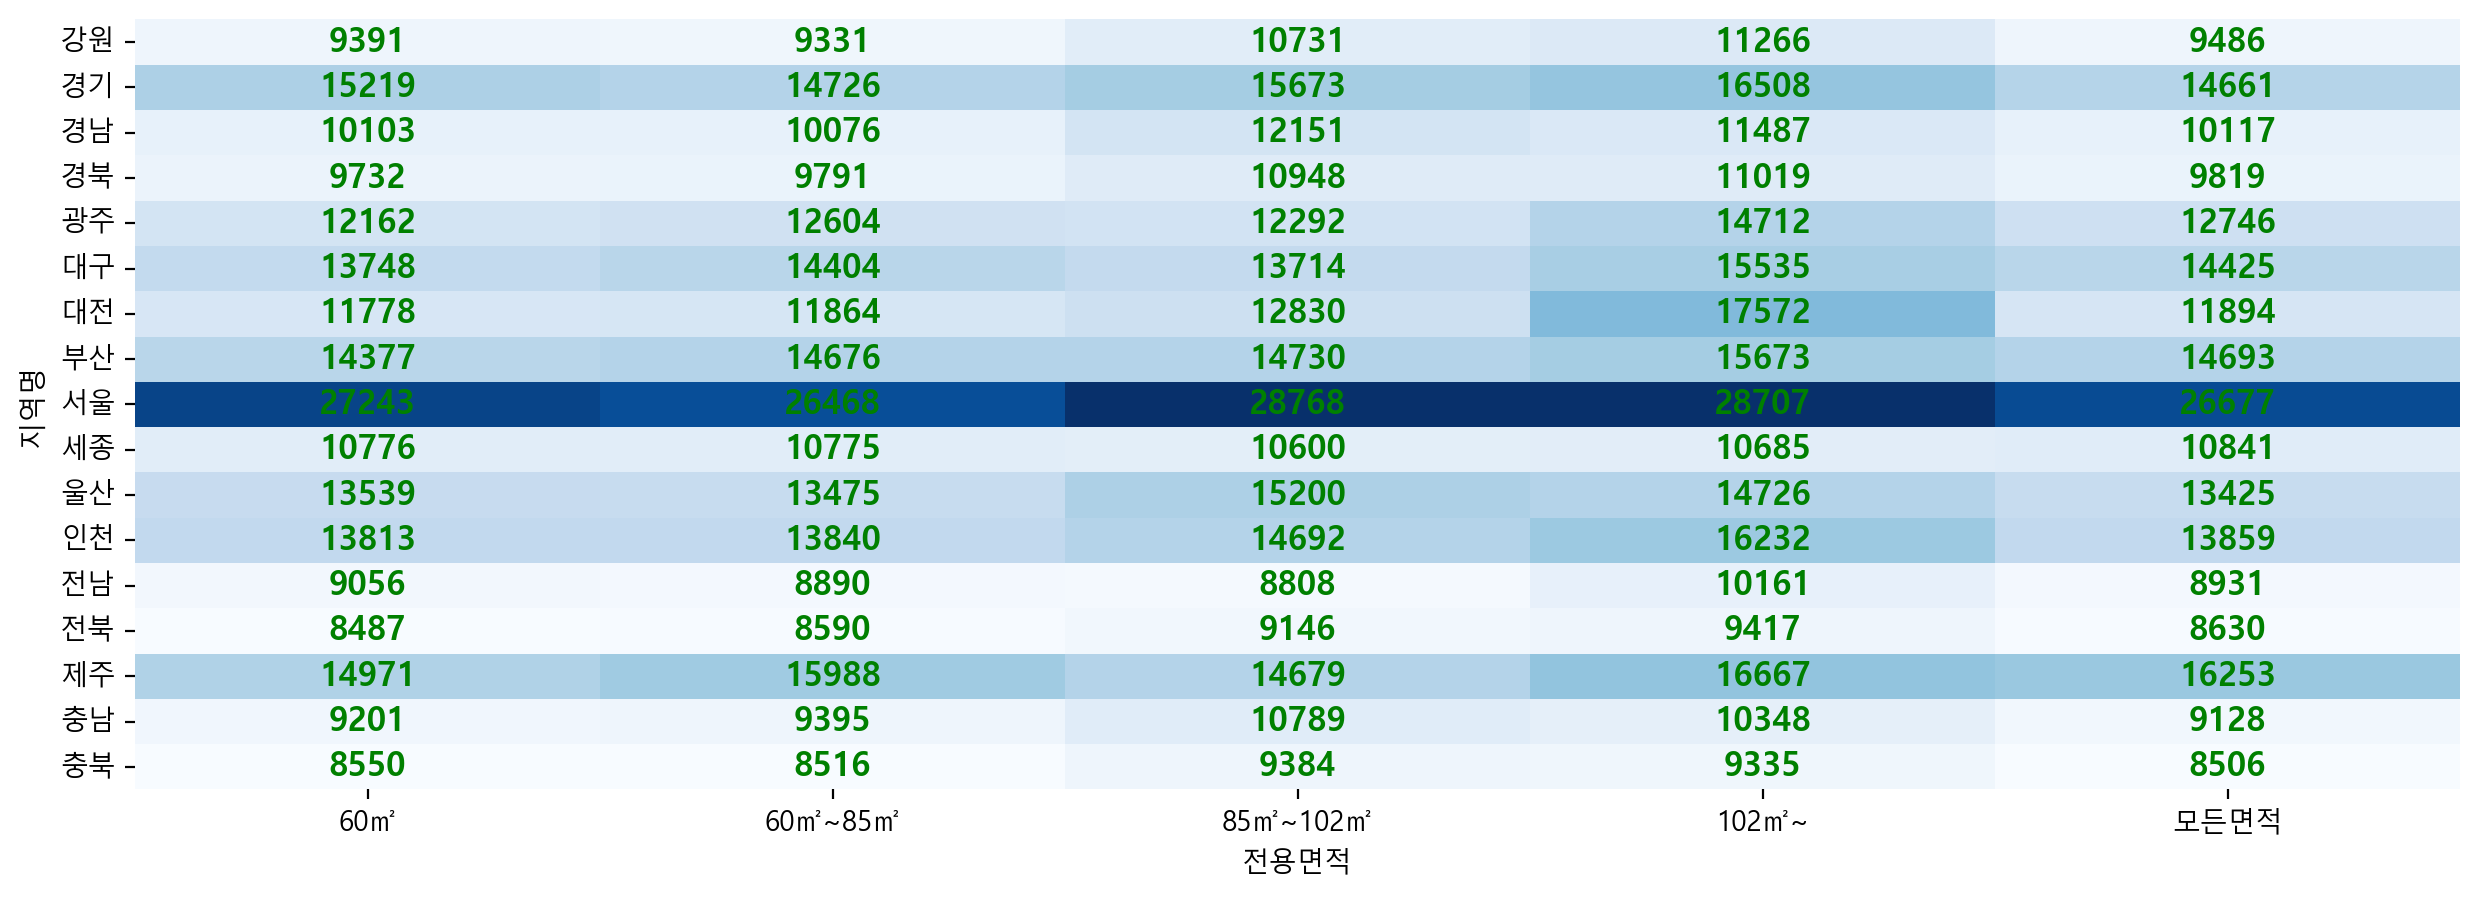

In [62]:
plt.figure(figsize=(15,5)) # 현재 plt 사이즈 조정(matplotlib, sns) / seaborn 사이즈 (sns.set())
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', annot_kws={'color':'green','size':12, 'weight':'bold'}, cbar=False)
plt.show()

## (5) 연도, 지역별 평당분양가격(평균) – 힌트:groupby후 unstack() vs. pivot_table

In [70]:
# 연도, 지역별 평당분양가격(평균) – 힌트:groupby후 unstack() vs. pivot_table
r = df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack()
r.loc[2015]

지역명
강원     7188.060
경기    11060.940
경남     8459.220
경북     7464.160
광주     7916.700
대구     9018.900
대전     8190.600
부산    10377.400
서울    20315.680
세종     8765.020
울산     9367.600
인천    10976.020
전남     6798.880
전북     7110.400
제주     7951.075
충남     7689.880
충북     6828.800
Name: 2015, dtype: float64

In [66]:
pd.pivot_table(
    df_last,
    index=['연도','지역명'],
    values='평당분양가격'
)

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2024 전남   13498.650000
     전북   12420.135484
     제주   25040.557143
     충남   12752.897143
     충북   12809.280000

[170 rows x 1 columns]

In [64]:
pd.pivot_table(
    df_last,
    index='연도',
    columns='지역명',
    values='평당분양가격'
)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940000,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970000,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185000,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420000,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540000,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080000,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080000,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550000,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210000,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


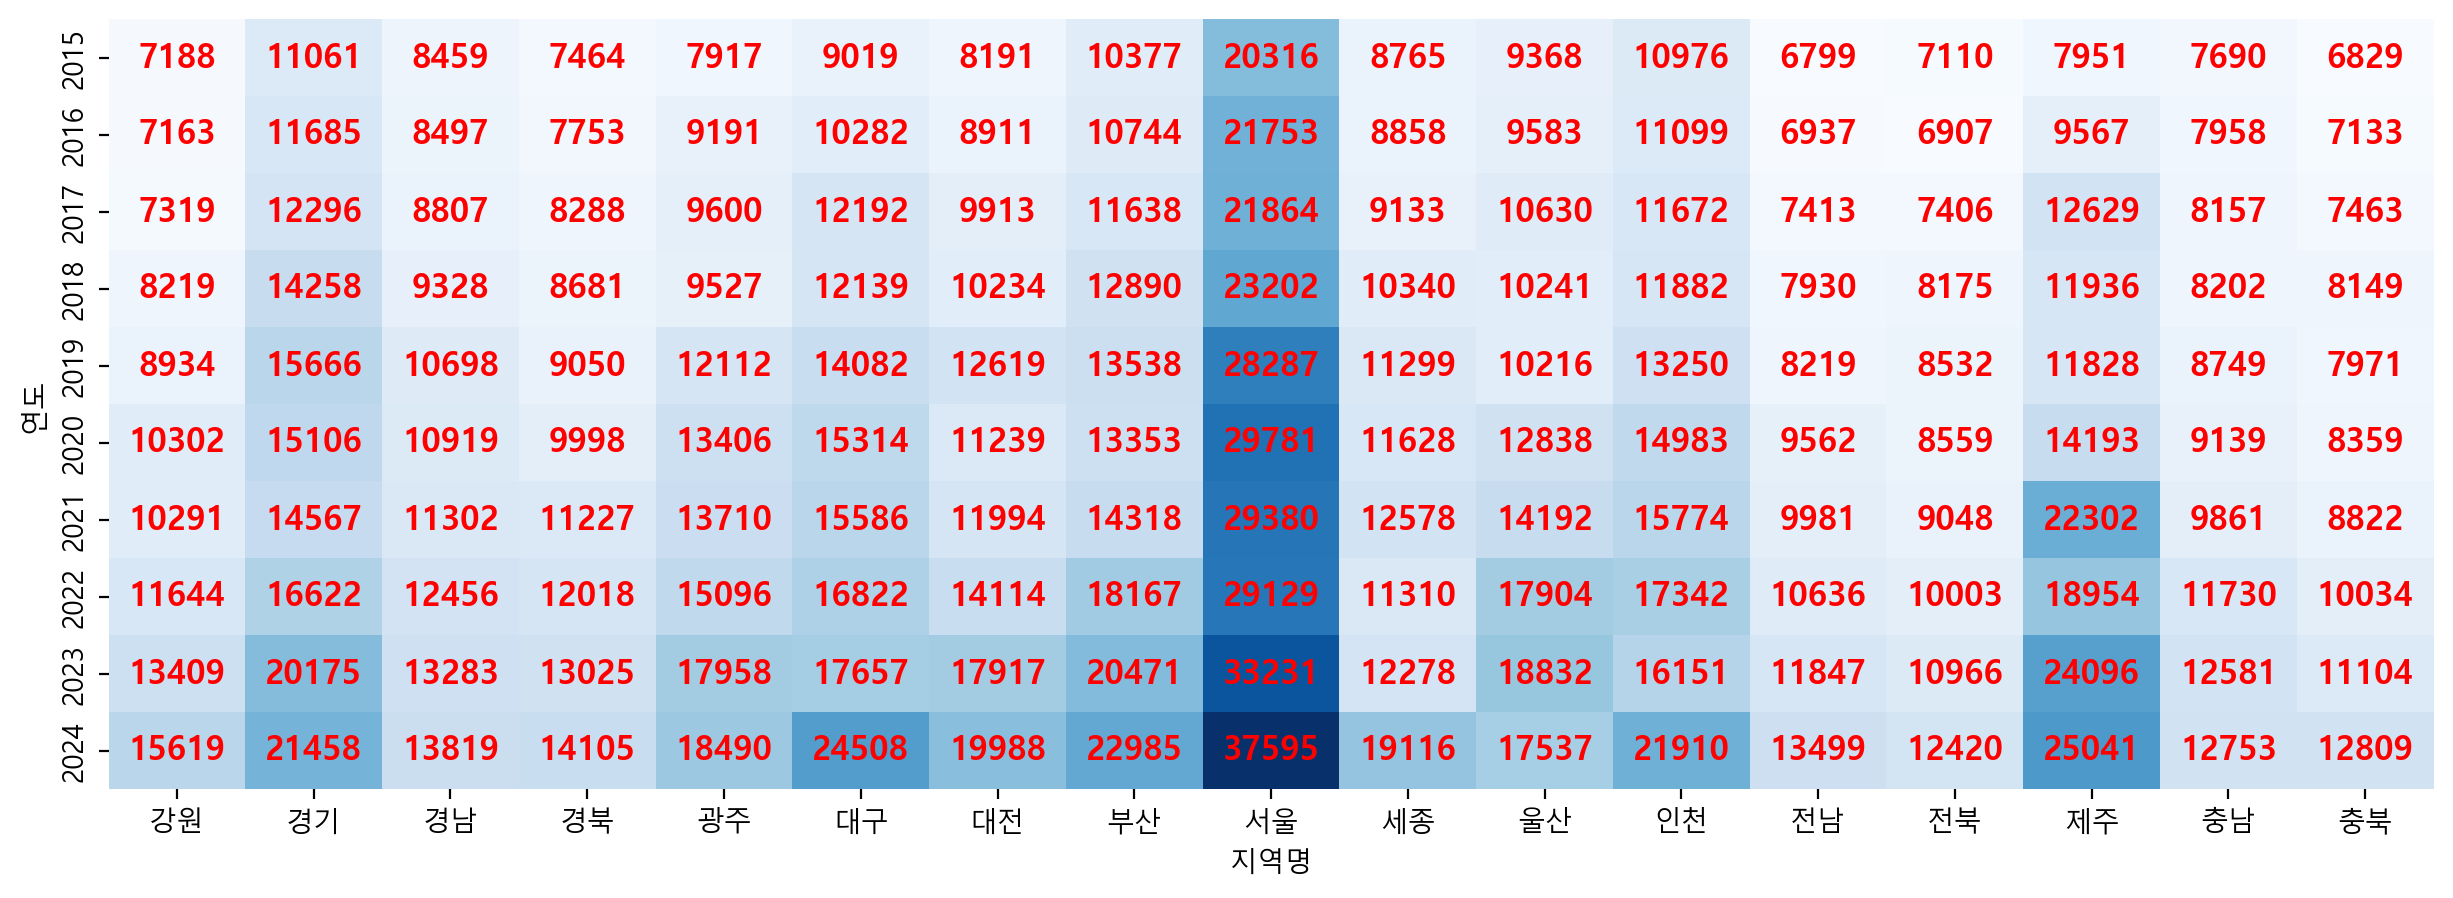

In [75]:
plt.figure(figsize=(15,5))
sns.heatmap(r, cmap='Blues', annot=True, fmt='.0f', annot_kws={'color':'red','size':12, 'weight':'bold'}, cbar=False)
plt.show()

# 8. 위의 도표를 시각화(matplotlib)

# 9. seaborn으로 시각화

# 10. 구조가 다른 df_first와 df_last를 연결